# ER-ACE tests

ER-ACE is a Continual Learning method which exploits Replay to deal with forgetting. In particular it uses two different loss for samples coming from the buffer and current data from the training set. Moreover, it use a masking technique to exclude already seen classes from the incoming data loss, avoiding the perturbation of their learned representation. <br>
<br>
This notebook contains the results of the tests done using the CIFAR-100 dataset. Experiments were taken with and without the use of on the fly augmentations, varying the size of the buffer (5, 20, 50 and 100 samples per class). For each experiment, a grid search was performed over three possible values of learning rate: 0.1, 0.01, 0.001.

In [ ]:
import torch
import logging
from utils import *

In [ ]:
cifar100_ntask = 20
aug_flag = False
batch_size = 10
rehearsal_batch_size = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logging.getLogger("fvcore").setLevel(logging.ERROR)
logging.getLogger("matplotlib").setLevel(logging.ERROR)

CIFAR-100 contains images of 32x32 pixels in RGB from 100 categories. The training set contains 50000 images, 500 for each class.<br>
In the cells below, images with and without the effect of the augmentations are compared

100%|██████████| 169M/169M [00:01<00:00, 91.2MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


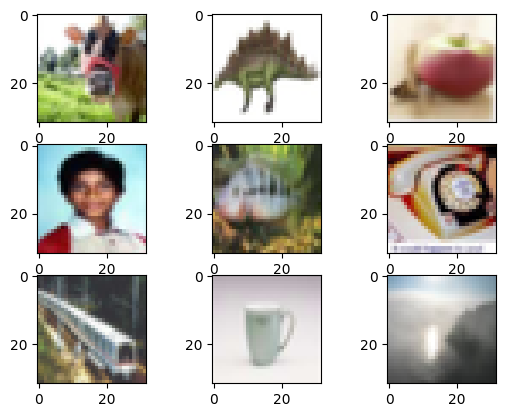

In [ ]:
from torchvision import datasets

benchmark_cifar100 = datasets.CIFAR100(root='./data', download=True)
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  image = benchmark_cifar100.data[i]
  plt.imshow(image)
plt.show()

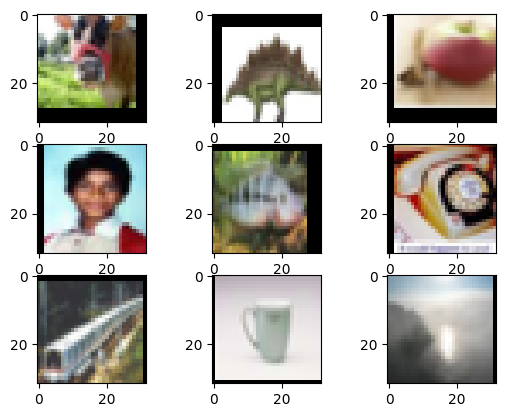

In [ ]:
from dataset import transform

for i in range(9):
  plt.subplot(330 + 1 + i)
  image = benchmark_cifar100.data[i]
  image = transform(image)
  plt.imshow(image.squeeze(0).permute(1, 2, 0))
plt.show()

## Model memory usage and FLOPs count per sample

In [ ]:
model_bits_occupacy(len(benchmark_cifar100.classes), True);

Bits used for the model: 35492480


In [ ]:
count_flops(len(benchmark_cifar100.classes), device, True);

FLOPs per sample: 55.59616


## CIFAR-100 experiments

In [ ]:
# Per visualizzare i risultati finali
# 4 valori per M, sia con uso di augmentation che senza

acc = [[0.0] * 4, [0.0] * 4]
fgt = [[0.0] * 4, [0.0] * 4]
aaa = [[0.0] * 4, [0.0] * 4]

In [ ]:
training_dataset, val_dataset = prepare_datasets(cifar100=True)

Files already downloaded and verified


### M = 5

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 13.3200
lr = 0.01, final accuracy = 12.6400
lr = 0.001, final accuracy = 9.0000

Best learning rate = 0.1

Final Results

avg_acc: 13.3200
avg_fgt: 26.2737
avg_anytime_acc: 23.5755
metrics: buffer_n_bits: 12288500


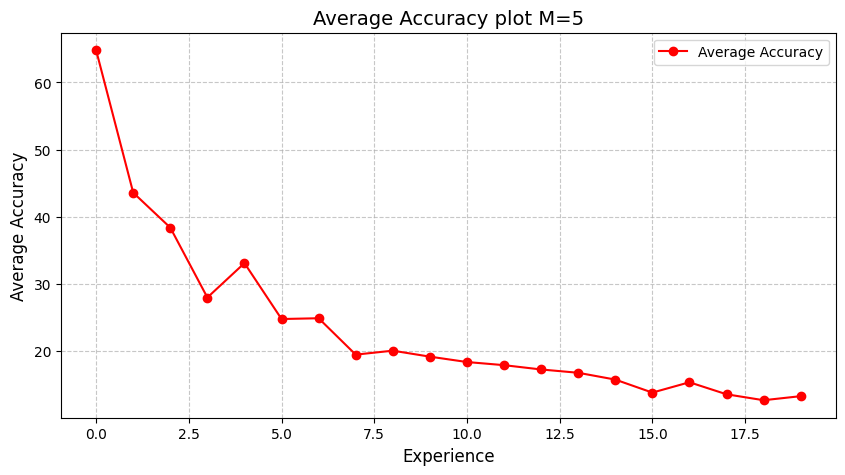

In [ ]:
(acc[0][0], fgt[0][0], aaa[0][0]), accuracies = experiment(5, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, False)
plot_aa(5, np.array(accuracies).T, (10, 5))

### M = 20

Training with grid search on learning rate ([0.1, 0.01, 0.001])


learning rate = 0.1:

Task 0:

Time 5.62

Validation Results:	 59	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 59.20


Task 1:

Time 5.29

Validation Results:	 48	46	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 47.60


Task 2:

Time 5.64

Validation Results:	 36	36	32	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 34.93


Task 3:

Time 6.24

Validation Results:	 37	37	25	32	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 33.40


Task 4:

Time 5.78

Validation Results:	 27	21	36	31	55	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 34.40


Task 5:

Time 6.67

Validation Results:	 33	35	29	28	40	23	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 31.73


Task 6:

Time 6.06

Validation Results:	 34	24	32	26	48	20	38	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 32.00


Task 7:

Time 6.19

Validation Results:	 29	28	21	25	45	21	20	25	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 27.30


Task 8:

Time 7.09

Validation Results:	 20	17	23	28	13	12	20	14	28	0	0	0	0	0	0	0	0	

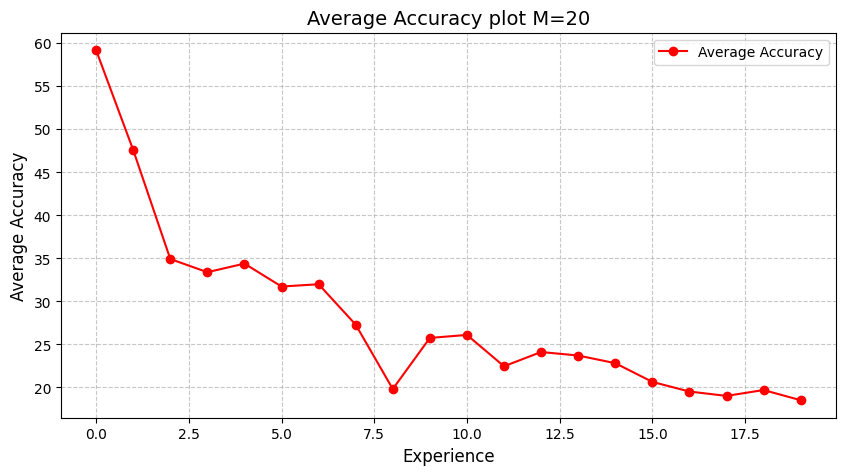

In [ ]:
(acc[0][1], fgt[0][1], aaa[0][1]), accuracies = experiment(20, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, True)
plot_aa(20, np.array(accuracies).T, (10, 5))

### M = 50

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 23.2400
lr = 0.01, final accuracy = 22.8000
lr = 0.001, final accuracy = 11.0800

Best learning rate = 0.1

Final Results

avg_acc: 23.2400
avg_fgt: 12.5053
avg_anytime_acc: 31.2984
metrics: buffer_n_bits: 122885000


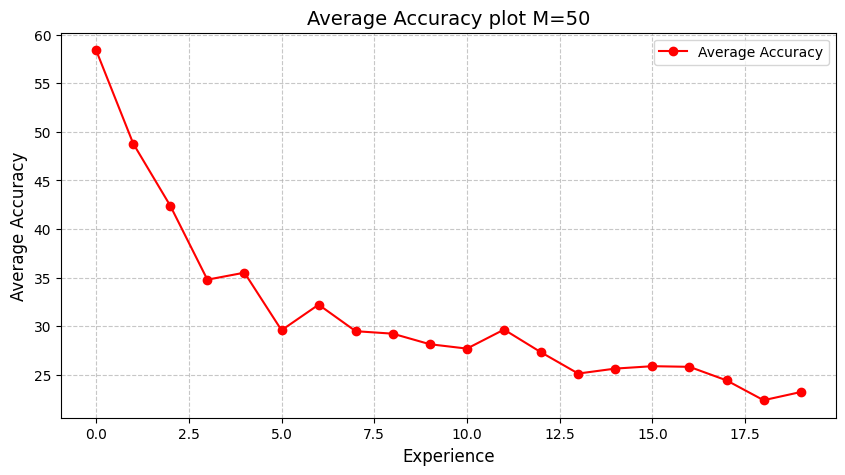

In [19]:
(acc[0][2], fgt[0][2], aaa[0][2]), accuracies = experiment(50, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, False)
plot_aa(50, np.array(accuracies).T, (10, 5))

### M = 100

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 25.4800
lr = 0.01, final accuracy = 23.6400
lr = 0.001, final accuracy = 10.2800

Best learning rate = 0.1

Final Results

avg_acc: 25.4800
avg_fgt: 12.4632
avg_anytime_acc: 30.9898
metrics: buffer_n_bits: 245770000


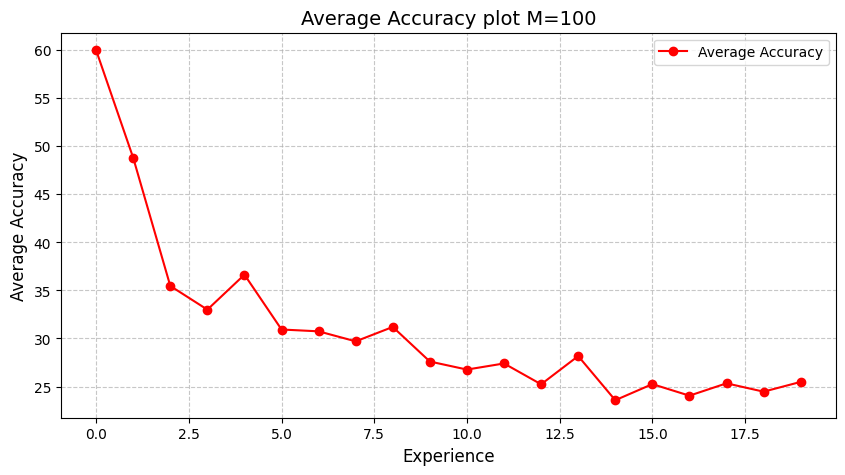

In [ ]:
(acc[0][3], fgt[0][3], aaa[0][3]), accuracies = experiment(100, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, False)
plot_aa(100, np.array(accuracies).T, (10, 5))

## Experiments with augmentations

In [ ]:
aug_flag = True

### M = 5

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 12.2800
lr = 0.01, final accuracy = 11.9200
lr = 0.001, final accuracy = 9.4000

Best learning rate = 0.1

Final Results

avg_acc: 12.2800
avg_fgt: 25.0947
avg_anytime_acc: 22.5904
metrics: buffer_n_bits: 12288500


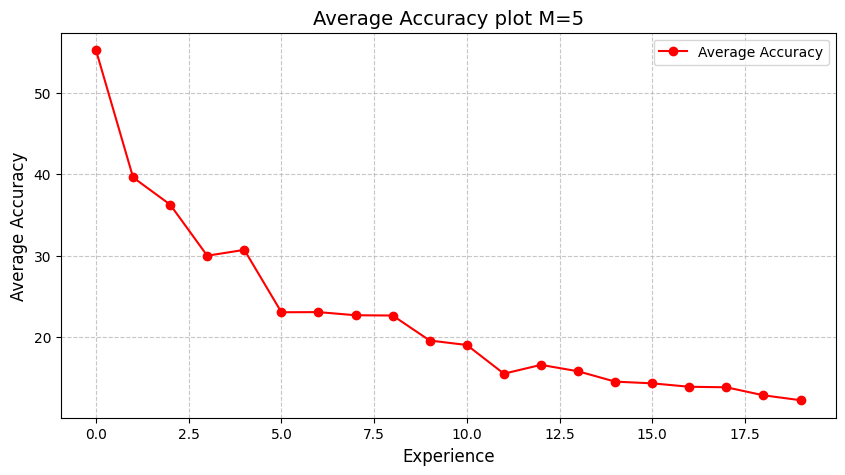

In [ ]:
(acc[1][0], fgt[1][0], aaa[1][0]), accuracies = experiment(5, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, False)
plot_aa(5, np.array(accuracies).T, (10, 5))

### M = 20

Training with grid search on learning rate ([0.1, 0.01, 0.001])


learning rate = 0.1:

Task 0:

Time 6.91

Validation Results:	 55	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 55.20


Task 1:

Time 7.51

Validation Results:	 52	44	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 48.40


Task 2:

Time 7.85

Validation Results:	 44	35	36	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 38.67


Task 3:

Time 7.07

Validation Results:	 46	34	25	23	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 32.40


Task 4:

Time 8.34

Validation Results:	 24	31	31	30	52	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 33.76


Task 5:

Time 7.85

Validation Results:	 29	28	25	32	52	12	0	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 30.27


Task 6:

Time 7.40

Validation Results:	 38	20	28	26	34	8	26	0	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 26.17


Task 7:

Time 8.59

Validation Results:	 30	32	24	26	40	8	25	13	0	0	0	0	0	0	0	0	0	0	0	0 	Avg Acc: 25.10


Task 8:

Time 9.10

Validation Results:	 29	32	34	20	32	15	23	18	19	0	0	0	0	0	0	0	0	0	

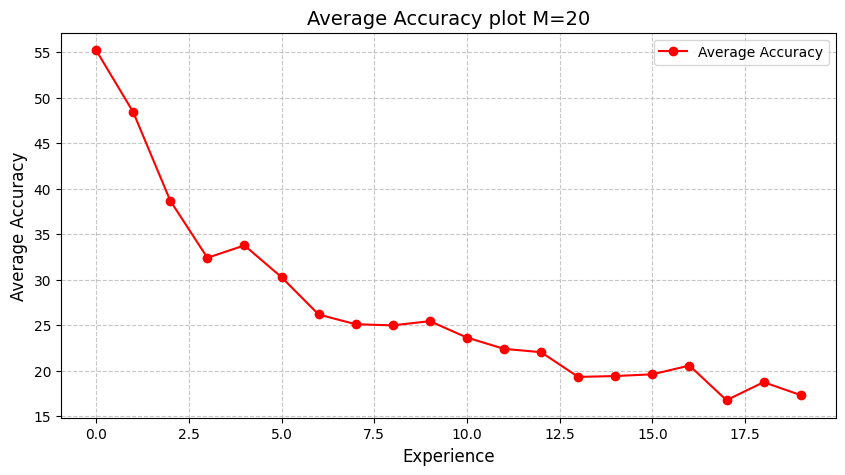

In [ ]:
(acc[1][1], fgt[1][1], aaa[1][1]), accuracies = experiment(20, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, True)
plot_aa(20, np.array(accuracies).T, (10, 5))

### M = 50

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 21.5600
lr = 0.01, final accuracy = 23.4800
lr = 0.001, final accuracy = 8.1600

Best learning rate = 0.01

Final Results

avg_acc: 23.4800
avg_fgt: 10.1053
avg_anytime_acc: 30.4601
metrics: buffer_n_bits: 122885000


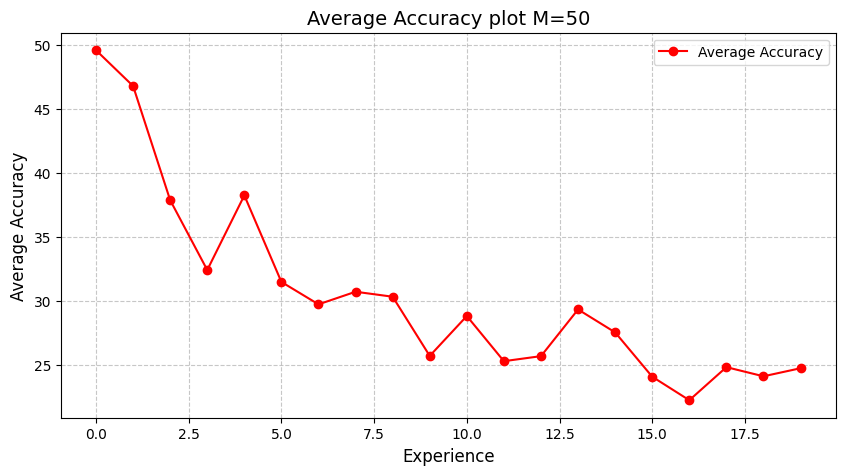

In [ ]:
(acc[1][2], fgt[1][2], aaa[1][2]), accuracies = experiment(50, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, False)
plot_aa(50, np.array(accuracies).T, (10, 5))

### M = 100

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 23.3200
lr = 0.01, final accuracy = 25.8000
lr = 0.001, final accuracy = 9.3600

Best learning rate = 0.01

Final Results

avg_acc: 25.8000
avg_fgt: 6.8632
avg_anytime_acc: 31.3897
metrics: buffer_n_bits: 245770000


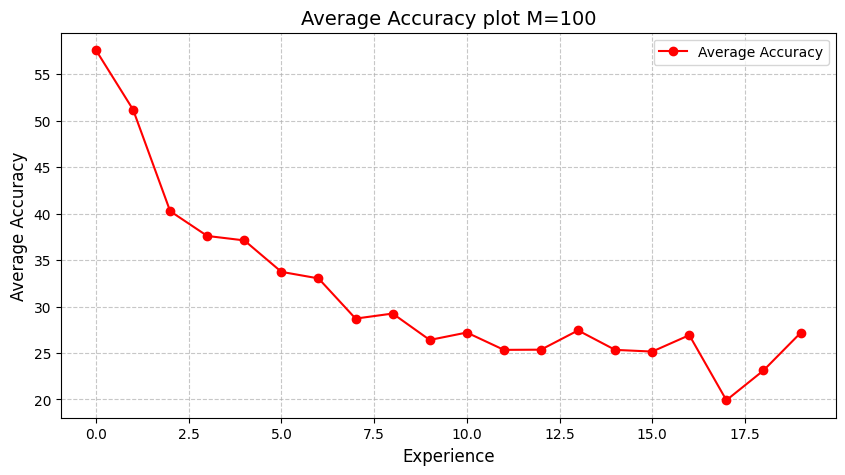

In [ ]:
(acc[1][3], fgt[1][3], aaa[1][3]), accuracies = experiment(100, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar100_ntask,
                                                           aug_flag, device, False)
plot_aa(100, np.array(accuracies).T, (10, 5))

## Results

In [20]:
import pandas as pd

# Visualizzazione dei risultati

def create_table(M_values, acc, fgt, aaa, dataset_name):
  for lst in [acc, fgt, aaa]:
    if not all(len(sublist) == len(M_values) for sublist in lst) or len(lst) != 2:
      print("Dimensioni delle liste dei risultati errate")

  # Dizionario per la tabella
  results = {
    "Metric": [
        "ACC (no aug)", "ACC (aug)",
        "FGT (no aug)", "FGT (aug)",
        "AAA (no aug)", "AAA (aug)",
    ]
  }

  for i, M in enumerate(M_values):
    results[f"M={M}"] = [
      acc[0][i], acc[1][i],  # Accuracy no aug e aug
      fgt[0][i], fgt[1][i],  # Forgetting no aug e aug
      aaa[0][i], aaa[1][i],  # Anytime Accuracy no aug e aug
    ]

  return pd.DataFrame(results)


cifar100_table = create_table([5, 20, 50, 100], acc, fgt, aaa, "CIFAR-100")
display(cifar100_table)

,Metric,M=5,M=20,M=50,M=100
0,ACC (no aug),13.320000,18.520000,23.240000,25.480000
1,ACC (aug),12.280000,17.320000,23.480000,25.800000
2,FGT (no aug),26.273684,14.863158,12.505263,12.463158
3,FGT (aug),25.094737,13.852632,10.105263,6.863158
4,AAA (no aug),23.575475,28.140779,31.298389,30.989779
5,AAA (aug),22.590392,27.007720,30.460149,31.389727
